# Итоговый проект по датасету Abalone
### Описание датасета Abalone

**Predict the age of abalone from physical measurements**

`Sex` - nominal -  M, F, and I (infant)

`Length` - continuous - mm -  Longest shell measurement

`Diameter` -  continuous - mm - perpendicular to length 

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried

`Rings` (`Age` = `Rings` + 1.5) - integer -  +1.5 gives the age in years (target)

[Link](https://archive.ics.uci.edu/dataset/1/abalone) to the description of the original dataset.

In [159]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
from pathlib import Path

DATASET_PATH = Path('datasets/abalone.csv')

In [161]:
df = pd.read_csv(DATASET_PATH)

In [162]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [163]:
# заменяем Rings на Age по условию задачи (если я понял правильно условия)
df.rename(columns={'Rings': 'Age'}, inplace=True)

In [164]:
# к Age добавляем 1.5 по условию задачи (если я понял правильно условия)
df['Age'] = df['Age'] + 1.5

In [165]:
# на всякий случае делаем сброс индексов
df.reset_index(drop=True, inplace=True)

In [166]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [167]:
# поменяем dtype для столбца Sex, так как он является категориальным
df['Sex'] = df['Sex'].astype('category')

In [168]:
df.reset_index(drop=True, inplace=True)

### Шаг 1. Общее исследование данных

In [169]:
# размерность датасета
df.shape

(4177, 9)

In [170]:
# более подробная информация о размерности и и типах датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4078 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4078 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4127 non-null   float64 
 8   Age             4177 non-null   float64 
dtypes: category(1), float64(8)
memory usage: 265.5 KB


In [171]:
# вывод полезных характеристик датасета по числовым столбцам
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,11.433684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,10.500000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [172]:
# вывод полезных характеристик датасета по категориальным столбцам
df.describe(include='category')

,Sex
count,4177
unique,4
top,M
freq,1447


In [173]:
# поиск дубликатов
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


In [174]:
# количество пропущенных значений
df.isnull().sum().sum()

248

In [175]:
# вывод 10 случайных строчек
df.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1109,M,0.520,0.400,0.145,0.7765,0.3525,0.1845,0.1850,10.5
3882,F,0.670,0.545,0.160,1.5415,0.5985,0.2565,0.4950,16.5
306,I,0.165,NaN,0.030,0.0215,0.0070,0.0050,0.0050,4.5
2400,I,0.445,0.330,0.100,0.4370,0.1630,0.0755,0.1700,14.5
2000,I,0.355,0.270,0.105,0.2710,0.1425,0.0525,0.0735,10.5
4131,I,0.580,0.425,0.145,0.8300,0.3790,0.1605,0.2575,12.5
1651,F,0.595,0.435,0.150,0.9000,0.4175,0.1700,0.2650,9.5
2091,F,0.505,0.390,0.115,0.6600,0.3045,0.1555,0.1750,9.5
351,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700,23.5
2314,F,0.580,0.475,0.135,0.9250,0.3910,0.1650,0.2750,15.5


### Итог: Шаг 1. Общее исследование данных

#### Количественные характеристики
|                              Характеристика | Количество |
|--------------------------------------------:|:----------:|
|                            Количество строк |  **4177**  |
|                         Количество столбцов |   **9**    |
|  Количество числовых столбцов (int и float) |   **8**    |
| Количество категориальных столбцов (object) |   **1**    |
|                       Количество дубликатов |   **0**    |
|                  Количество пустых значений |  **248**   |

### Шаг 2. Однофакторный анализ

In [176]:
# проверка ошибочных значений по столбцу Sex
df['Sex'].unique()

['M', 'F', 'I', 'f']
Categories (4, object): ['F', 'I', 'M', 'f']

In [177]:
# обработка ошибочных значений по столбцу Sex
df['Sex'].replace('f', 'F', inplace=True)
df['Sex'].unique()

['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']

In [178]:
# проверка ошибочных значений по числовым столбцам
numeric_column_indices = df.select_dtypes(include=['float', 'int']).columns
errors_indices = []
for index_column in numeric_column_indices:
    column = df[index_column]
    errors = column[column <= 0]
    if errors.shape[0] > 0:
        errors_index_list = errors.index.tolist()
        errors_indices += errors_index_list
        print(df.loc[errors_index_list])

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Age  
1257          0.0860        0.1150  9.5  
3996          0.0285        0.3505  7.5  


In [179]:
# обработка ошибочных значений по числовым столбцам
df.drop(errors_indices, inplace=True)
df.reset_index(drop=True)
df.shape

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


(4175, 9)

In [180]:
# количество пропусков в процентном соотношении по столбцам
na_list = df.isnull().mean() * 100
na_list = na_list[na_list != 0]
na_list

Diameter        2.371257
Whole weight    2.371257
Shell weight    1.197605
dtype: float64

In [181]:
# заполняем пустые значения медианной отдельно в каждом столбце
indices = na_list.index[:]
for index in indices:
    df[index].fillna(df[index].median(), inplace=True)

In [182]:
# остались ли пропуски? нет
df.isnull().mean() * 100

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Age               0.0
dtype: float64

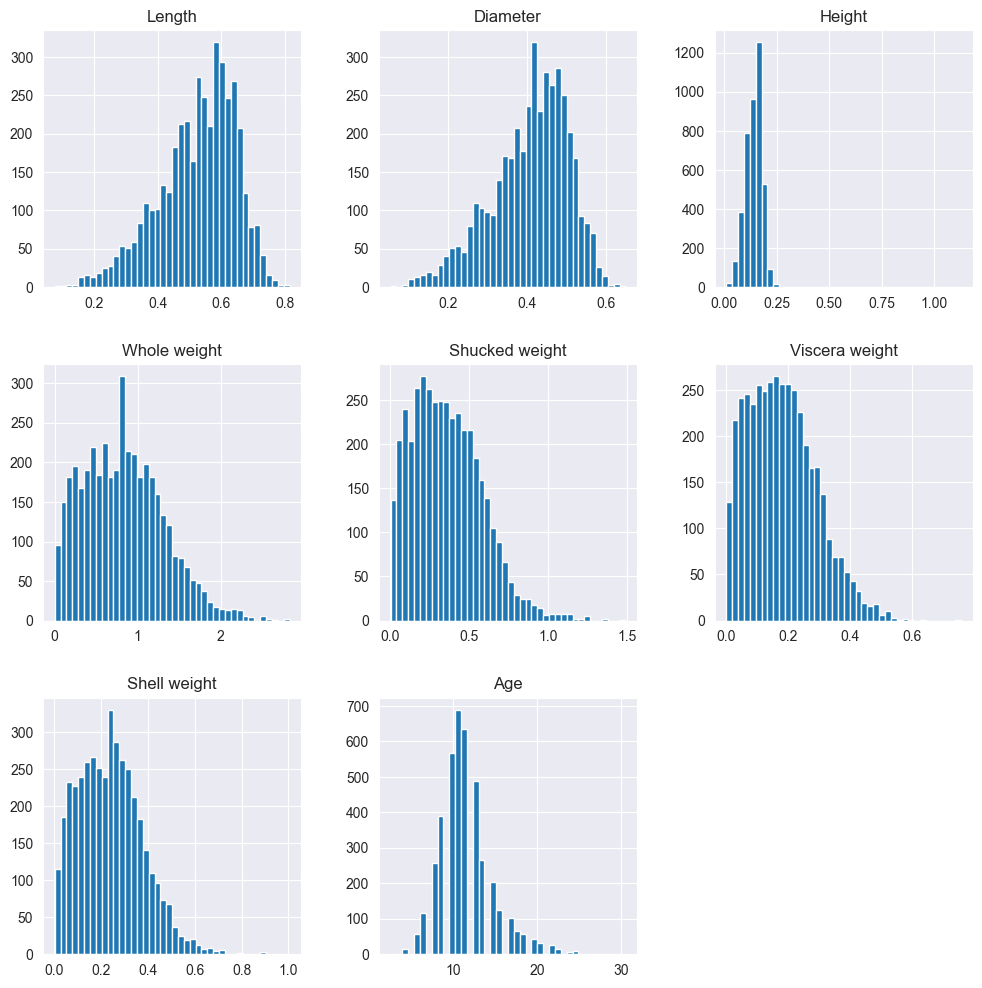

In [183]:
# распределения значений по всем числовым столбцам
# данные как можно заметить уже нормализованы (это не было учтено на прошлом шаге при поиске ошибочных данных)
# Length, Height (спорно, так как есть выбросы) Diameter, Age (есть пробоины): больше похоже на нормальное распределение
# Whole weight, Shucked weight, Viscera weight, Shell weight: больше похоже на логнормальное распределение
df.hist(bins=40, figsize=(12, 12));

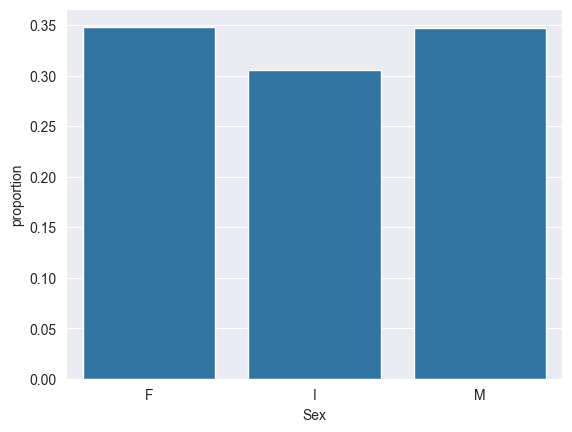

In [184]:
# вывод распределения единственного категориального столбца Sex
# равномерно распределены значения
sex_dist = df['Sex'].value_counts(normalize=True)
sns.barplot(data=sex_dist);

### Итог: Шаг 2. Однофакторный анализ

#### Дубликаты
Отсутствуют.

#### Пустые значения
Пресутсвуют в трех столбцах: `Diameter`, `Whole weight`, `Shell weight`.
Процентное соотношение пропусков по столбцам меньше 3%. 
Было принято решение заполнить пустые ячейки медианным значением внутри каждого столбца отдельно.

#### Ошибочные значения
Пресутсвуют в двух столбцах: `Sex` и `Height`.
`Sex`: присутствовало значение `f`, которое по задаче отсутствует. Логически было отнести значения `f` к `F`, что и было сделано.
`Height`: если не учитывать, что нормализация данных была проведена до разведочного анализа, то высота априори не может быть нулевой, поэтому было принято решение удалить строчки с нулевыми значениями.

#### Распределения
`Length`, `Height` (спорно, так как есть выбросы), `Diameter`, `Age` (есть пробоины): больше похоже на нормальное распределение
`Whole weight`, `Shucked weight`, `Viscera weight`, `Shell weight`: больше похоже на логнормальное распределение
`Sex`: равномерное распределение

#### Связь с целевой переменной 
* Не понял что подразумевается под этим в задаче на данном этапе, поэтому перенес данный пункт в следующй шаг.


### Шаг 3. Корреляции и связь с целевой переменной

In [185]:
# отображаем матрицы корреляций с разными методами (Пирсон, Спирман, Кендалл) корреляций на хитмапах
corr_pearson = df.corr(method='pearson', numeric_only=True)
corr_spearman = df.corr(method='spearman', numeric_only=True)
corr_kendall = df.corr(method='kendall', numeric_only=True)

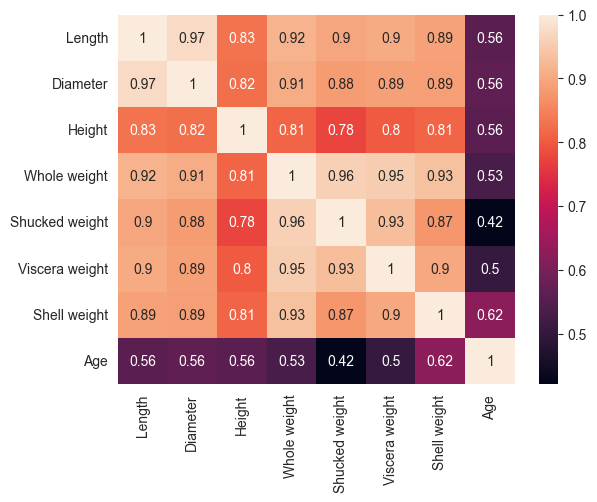

In [186]:
# корреляции по методу Пирсона
# между не целевыми переменными корреляции высокие
# между целевой и не целевыми переменными корреляции средние
sns.heatmap(data=corr_pearson, annot=True);

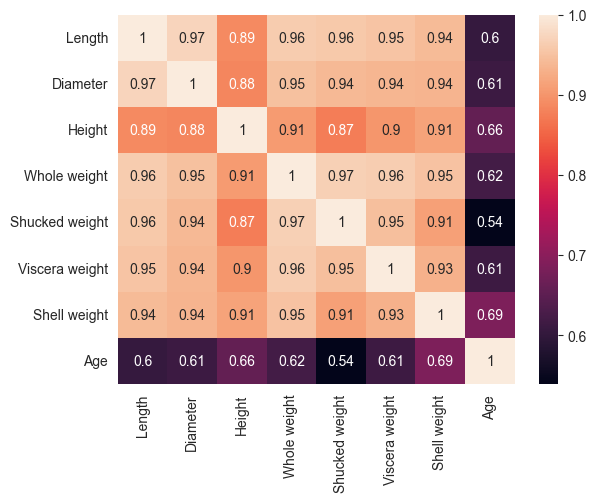

In [187]:
# корреляции по методу Спирмана
# между не целевыми переменными корреляции высокие
# между целевой и не целевыми переменными корреляции средние
# на удивление коэффициенты корреляций по данному методу высокие
sns.heatmap(data=corr_spearman, annot=True);

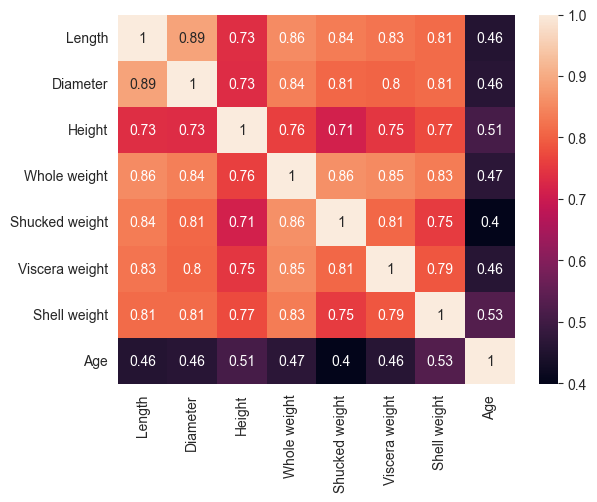

In [188]:
# корреляции по методу Кендалл
# между не целевыми переменными корреляции высокие
# между целевой и не целевыми переменными корреляции средние
sns.heatmap(data=corr_kendall, annot=True);

In [189]:
# так как у нас единственный категориальный признак, то надо только провести корреляции между числовыми признаками
# следовательно, V-меру Крамера не применить
# с помощью метода ANOVA измерим связь между категориальными и числовыми признаками
# все числовые признаки имеют связь между категориальными признаками 
from scipy.stats import f_oneway

corr_object = []

for c1 in df.select_dtypes(include=['category']):
    for c2 in df.select_dtypes(include=['float']):
        category_group_lists = df.groupby(c1, observed=True)[c2].apply(list)
        anova_results = f_oneway(*category_group_lists)

        if anova_results[1] >= 0.05:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'No'})
        else:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'Yes'})

anova_general_result = pd.DataFrame.from_dict(corr_object)
anova_general_result

,category,numerical,is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Age,Yes


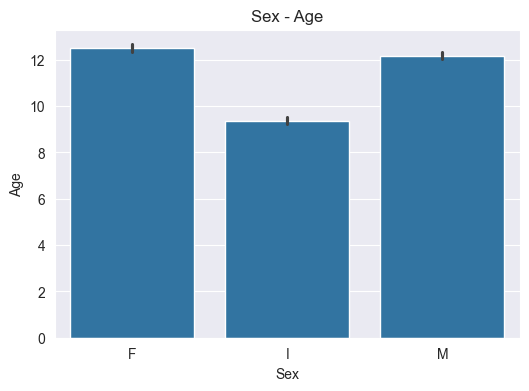

In [190]:
# график зависимости Sex от Age
# логично, что младшие особи являются infant
plt.figure(figsize=(6, 4))

sns.barplot(x='Sex', y='Age', data=df)
plt.title('Sex - Age')
plt.show();

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Length', ylabel='Age'>

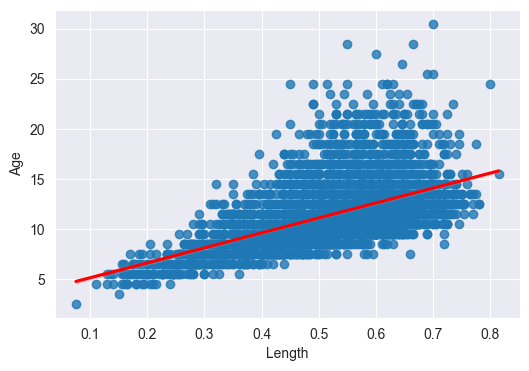

<Axes: xlabel='Diameter', ylabel='Age'>

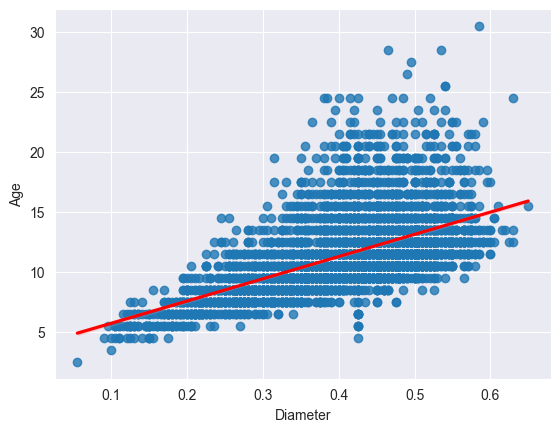

<Axes: xlabel='Height', ylabel='Age'>

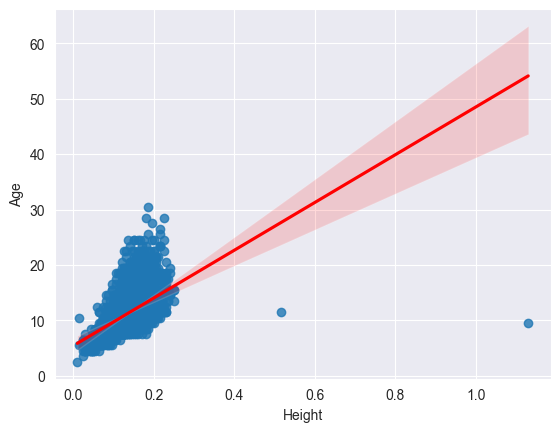

<Axes: xlabel='Whole weight', ylabel='Age'>

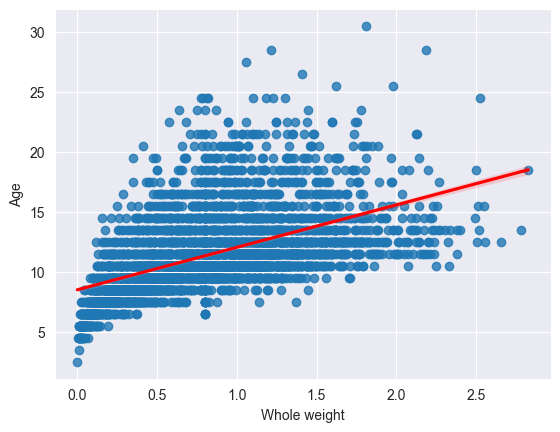

<Axes: xlabel='Shucked weight', ylabel='Age'>

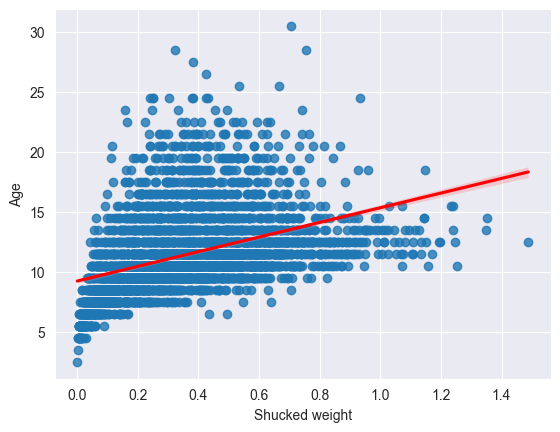

<Axes: xlabel='Viscera weight', ylabel='Age'>

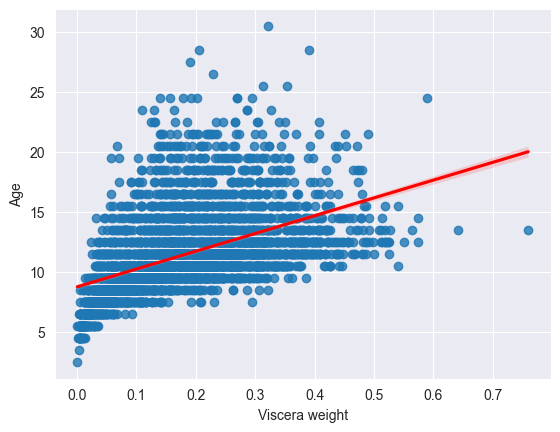

<Axes: xlabel='Shell weight', ylabel='Age'>

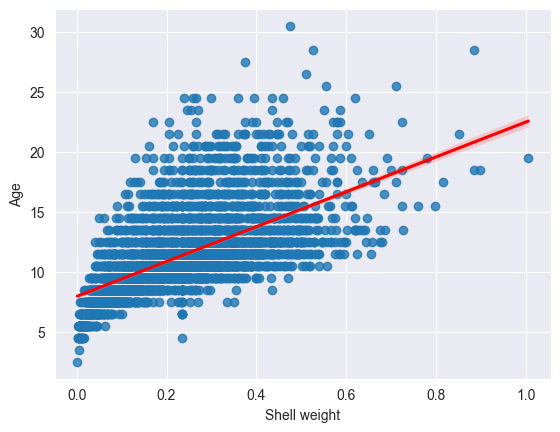

In [191]:
# графики зависимостей всех числовых признаков от Age
# Length - Age: что-то похожее на линейную корреляцию с некоторыми выбросами
# Diameter - Age: что-то похожее на линейную корреляцию с некоторыми выбросами
# Height - Age: больше похоже на квадратичную зависимость, чем на линейную. Но в целом сомнительно (в будущем надо будет высчитывать новый признак)
# Whole weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
# Shucked weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
# Viscera weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
# Shell weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
plt.figure(figsize=(6, 4))

for index in df.select_dtypes(include=['float']):
    if index == 'Age':
        continue
    sns.regplot(x=df[index], y=df['Age'], line_kws=dict(color="r"))
    plt.show()

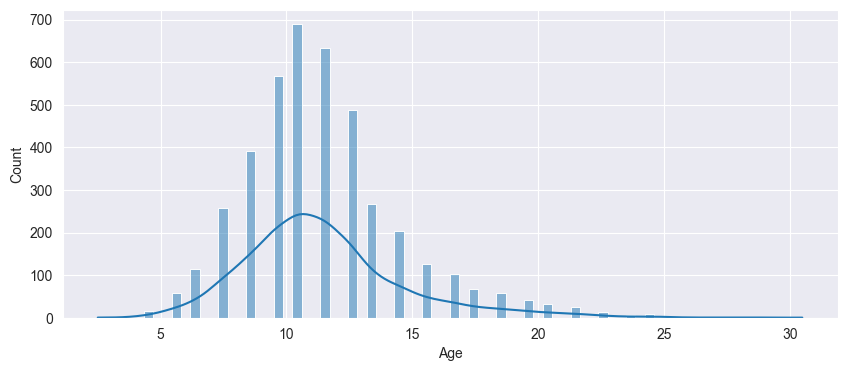

In [192]:
# распределение целевой переменной (Age)
# видим что-то похожее на нормальное распределение, но стоит отметить, что справа есть небольшой хвост
# также стоит отметить, что есть пробоины в районе значений от 5 до 10 и больше 10
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True);

### Итог: Шаг 3. Корреляции и связь с целевой переменной

#### Корреляции
Для анализа корреляций между признаками были использованы следующие методы: Пирсон, Спирман, Кендалл для числовых и ANOVA для категориальных с числовыми.
Категориальные признаки имеют связь со всеми числовыми признаками.
Между не целевыми (не `Age`) переменными корреляции высокие (от 0.75 до 0.96).
Между целевой (`Age`) и не целевыми переменными корреляции средние (от 0.45 до 0.6).
В целом удовлетворительные корреляции с целевой переменной (`Age`), но в будущем можно будет улучшить после подробного изучения связей с целевой переменой (следующий подпункт).

#### Связь с целевой переменной
Был построен график зависимости `Sex` от `Age`. 
В нем ничего удивительного не наблюдалось:
* `M` и `F` - взрослые особи, у которых возраст приблизительно одинаковый в среднем (у `M` больше на чуть-чуть);
* `I` - младенцы, у которых возраст меньше, чем у взрослых.
Были построены графики зависимостей всех числовых признаков от `Age`.
* `Length` - `Age`: что-то похожее на линейную корреляцию с некоторыми выбросами;
* `Diameter` - `Age`: что-то похожее на линейную корреляцию с некоторыми выбросами;
* `Height` - `Age`: больше похоже на квадратичную зависимость, чем на линейную. Но в целом сомнительно (в будущем надо будет высчитывать новый признак);
* `Whole weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак);
* `Shucked weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак);
* `Viscera weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак);
* `Shell weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак).

Также было построено отдельно распределение целевого признака (`Age`).
Было отмечено, что распределение похоже на нормальное, но стоит отметить, что справа есть небольшой хвост.
Также есть пробоины в районе значений от 5 до 10 и больше 10.

В целом с данными датасетом можно комфортно работать, так как есть что улучшать в сторону связей целевого признака с остальными числовыми признаками.

### Сравнение Pandas и Polars

In [193]:
import polars as pl

In [194]:
ABALONE_BIG_PATH = Path('temp/abalone_big.csv')

df_big = df.copy()
# дублируем данные до миллиона строчек
for i in range(1_000_000 // df_big.shape[0] + 1):
    df_big = pd.concat([df_big, df])

df_big.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   Sex             1006175 non-null  category
 1   Length          1006175 non-null  float64 
 2   Diameter        1006175 non-null  float64 
 3   Height          1006175 non-null  float64 
 4   Whole weight    1006175 non-null  float64 
 5   Shucked weight  1006175 non-null  float64 
 6   Viscera weight  1006175 non-null  float64 
 7   Shell weight    1006175 non-null  float64 
 8   Age             1006175 non-null  float64 
dtypes: category(1), float64(8)
memory usage: 70.0 MB


In [195]:
# сохраняем большой датасет
df_big.to_csv(ABALONE_BIG_PATH, index=False)

In [196]:
%%time
# Pandas
df_big = pd.read_csv(ABALONE_BIG_PATH)

CPU times: total: 672 ms
Wall time: 668 ms


In [197]:
%%time
# Polars
df_pl_big = pl.read_csv(ABALONE_BIG_PATH)

CPU times: total: 703 ms
Wall time: 120 ms


Polars загружает данные почти в 6 раз быстрее Pandas.

In [198]:
%%time
# Pandas
df_big[(df_big['Age'] <= 7) & (df_big['Sex'] == 'I')]

CPU times: total: 62.5 ms
Wall time: 60 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
42,I,0.240,0.175,0.045,0.07000,0.0315,0.0235,0.0200,6.5
43,I,0.205,0.150,0.055,0.79925,0.0255,0.0150,0.0120,6.5
44,I,0.210,0.150,0.050,0.04200,0.0175,0.0125,0.0150,5.5
58,I,0.245,0.190,0.060,0.08600,0.0420,0.0140,0.0250,5.5
125,I,0.270,0.195,0.060,0.07300,0.0285,0.0235,0.0300,6.5
...,...,...,...,...,...,...,...,...,...
1005962,I,0.270,0.205,0.075,0.11800,0.0590,0.0310,0.0305,5.5
1005963,I,0.270,0.190,0.060,0.09900,0.0445,0.0170,0.0300,6.5
1005993,I,0.185,0.135,0.045,0.03200,0.0110,0.0065,0.0100,5.5
1005994,I,0.245,0.175,0.055,0.07850,0.0400,0.0180,0.0200,6.5


In [199]:
%%time
# Polars
df_pl_big.filter((pl.col('Age') <= 7) & (pl.col('Sex') == 'I'))

CPU times: total: 15.6 ms
Wall time: 18 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
str,f64,f64,f64,f64,f64,f64,f64,f64
"""I""",0.24,0.175,0.045,0.07,0.0315,0.0235,0.02,6.5
"""I""",0.205,0.15,0.055,0.79925,0.0255,0.015,0.012,6.5
"""I""",0.21,0.15,0.05,0.042,0.0175,0.0125,0.015,5.5
"""I""",0.245,0.19,0.06,0.086,0.042,0.014,0.025,5.5
"""I""",0.27,0.195,0.06,0.073,0.0285,0.0235,0.03,6.5
"""I""",0.175,0.13,0.055,0.0315,0.0105,0.0065,0.0125,6.5
"""I""",0.17,0.13,0.095,0.03,0.013,0.008,0.01,5.5
"""I""",0.235,0.16,0.04,0.048,0.0185,0.018,0.015,6.5
"""I""",0.315,0.21,0.06,0.125,0.06,0.0375,0.035,6.5


Polars фильтрует данные почти в 5 раз быстрее Pandas.

In [200]:
%%time
# Pandas
(df_big.groupby('Sex')
 .agg(
    AgeMean=('Age', 'mean'),
    LengthMean=('Length', 'mean'),
    HeightMean=('Height', 'mean'),
).sort_values(by='AgeMean', ascending=False))

CPU times: total: 78.1 ms
Wall time: 76 ms


,AgeMean,LengthMean,HeightMean
Sex,,,
F,12.501376,0.572978,0.155959
M,12.178645,0.560059,0.150847
I,9.373626,0.427359,0.108100


In [201]:
%%time
# Polars
(df_pl_big
 .group_by(by='Sex')
 .agg([
    pl.mean('Age'),
    pl.mean('Length'),
    pl.mean('Height'),
])
 .sort(by='Age', descending=True))

CPU times: total: 46.9 ms
Wall time: 46 ms


Sex,Age,Length,Height
str,f64,f64,f64
"""F""",12.501376,0.572978,0.155959
"""M""",12.178645,0.560059,0.150847
"""I""",9.373626,0.427359,0.1081


Polars агрегирует данные почти в 2 раз быстрее Pandas.

### Итог: Сравнение Pandas и Polars
В целом Polars намного быстрее Pandas. А если еще грамотно использовать lazy запуск в Polars, то можно выиграть по времени в 20 раз по сравнению с Pandas.

## Заключение
Данные адекватные, имеют зависимости с целевым признаком, есть куда работать.

## Обучение

### Шаг 1. Новые признаки

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4175 non-null   category
 1   Length          4175 non-null   float64 
 2   Diameter        4175 non-null   float64 
 3   Height          4175 non-null   float64 
 4   Whole weight    4175 non-null   float64 
 5   Shucked weight  4175 non-null   float64 
 6   Viscera weight  4175 non-null   float64 
 7   Shell weight    4175 non-null   float64 
 8   Age             4175 non-null   float64 
dtypes: category(1), float64(8)
memory usage: 297.8 KB


Whole weight corr = 0.5319102932776802
new_Whole weight corr = 0.5776058865076743


<Axes: xlabel='Whole weight', ylabel='Age'>

<Axes: xlabel='new_Whole weight', ylabel='Age'>

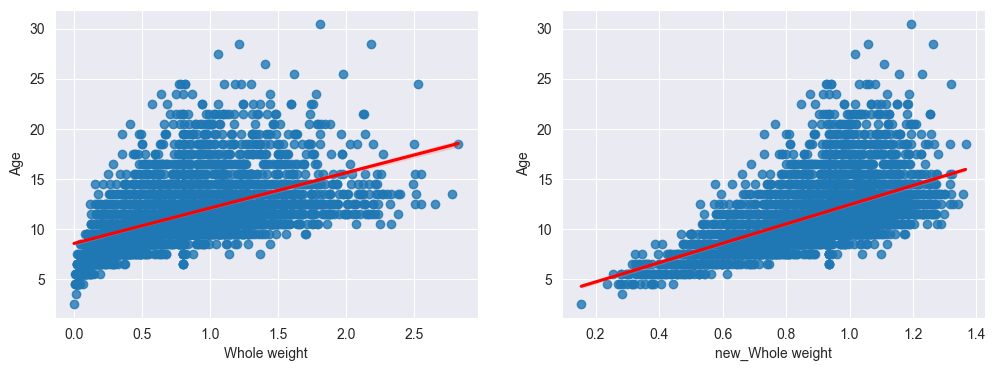

Shucked weight corr = 0.42059739391710493
new_Shucked weight corr = 0.49477720357953753


<Axes: xlabel='Shucked weight', ylabel='Age'>

<Axes: xlabel='new_Shucked weight', ylabel='Age'>

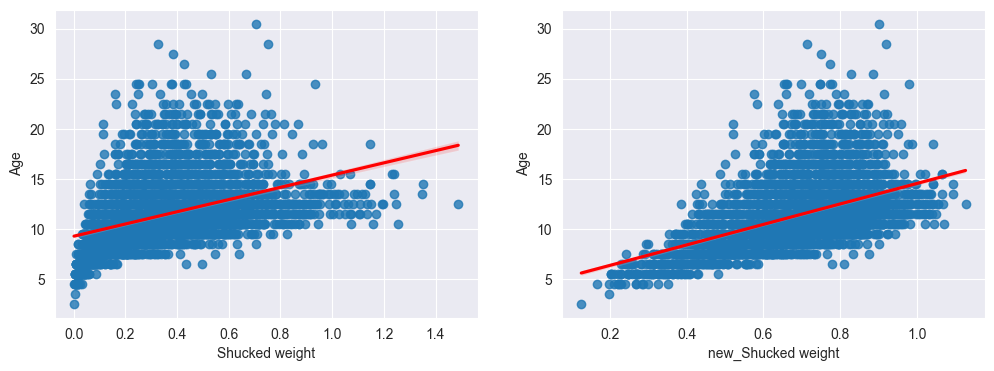

Viscera weight corr = 0.5035622312738293
new_Viscera weight corr = 0.5609677824689546


<Axes: xlabel='Viscera weight', ylabel='Age'>

<Axes: xlabel='new_Viscera weight', ylabel='Age'>

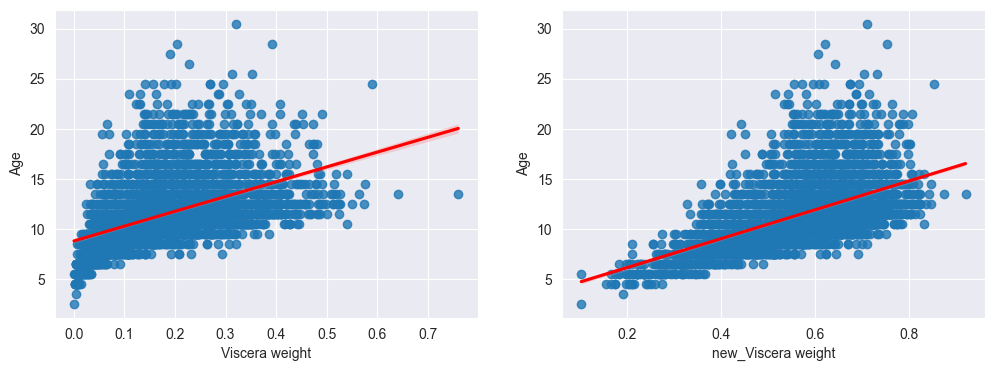

Shell weight corr = 0.622547170131204
new_Shell weight corr = 0.6426447216702096


<Axes: xlabel='Shell weight', ylabel='Age'>

<Axes: xlabel='new_Shell weight', ylabel='Age'>

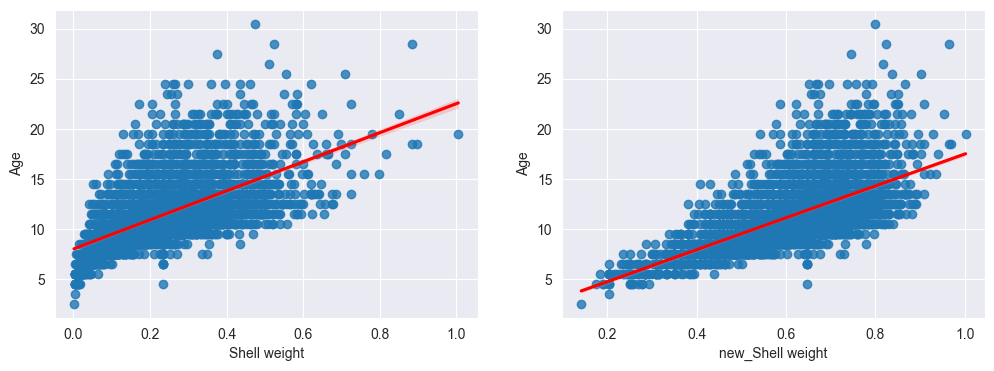

Среднее изменение корреляций: 0.049344626406639405
Изменение суммы корреляций: 0.19737850562655762


In [203]:
# разведочный анализ показал, что следующие признаки имеют квадратичную зависимость с целевым признаком
# создадим новые признаки на основе старых возведенных в степень 0.3 (кф найден простым подбором)
# сравниваем графики корреляций и коэффициенты
# четко заметно, что для каждого признака есть улучшения и графики корреляций выглядят более линейно, чем раньше
indices = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
sum_changes = 0
for old_index in indices:
    new_index = f'new_{old_index}'
    df[new_index] = df[old_index] ** 0.3
    old_corr = np.corrcoef(df[old_index], df['Age'])[0][1]
    new_corr = np.corrcoef(df[new_index], df['Age'])[0][1]
    print(f'{old_index} corr = {old_corr}')
    print(f'{new_index} corr = {new_corr}')
    sum_changes += new_corr - old_corr

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.regplot(x=df[old_index], y=df['Age'], line_kws=dict(color="r"), ax=axes[0])
    sns.regplot(x=df[new_index], y=df['Age'], line_kws=dict(color="r"), ax=axes[1])
    plt.show()

mean_changes = sum_changes / len(indices)
print(f'Среднее изменение корреляций: {mean_changes}')
print(f'Изменение суммы корреляций: {sum_changes}')

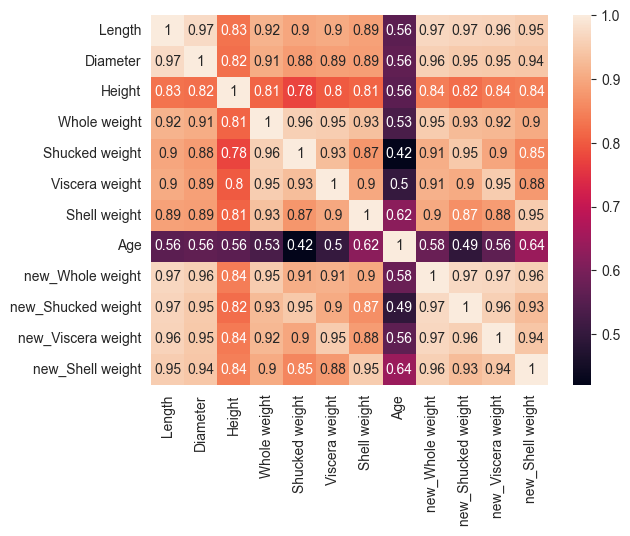

In [204]:
# вывод матрицы корреляций
# тут четко видно, как у новых признаков с другими в среднем больше коэффициент 
# следовательно, обучаемая модель с новыми признаками должна быть точнее
corr_pearson = df.corr(method='pearson', numeric_only=True)
sns.heatmap(data=corr_pearson, annot=True);

In [205]:
# подготавливаем признаки для обучения. Берем отдельно новые и старые, чтобы можно было сравнить.
def_col = ['Sex', 'Length', 'Diameter', 'Height', ]
x = df[[*def_col, 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
new_x = df[[*def_col, 'new_Whole weight', 'new_Shucked weight', 'new_Viscera weight', 'new_Shell weight']]

y = df['Age']

<Axes: >

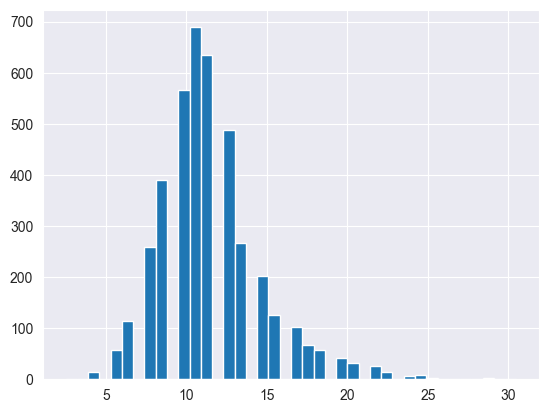

In [206]:
# распределение целевого признака
y.hist(bins=40)

In [207]:
# делим датасеты для обучения и тестирования 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, y, test_size=0.25, random_state=1)

In [208]:
# создаем трансформеры колонок для нормализации числовых значений

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
new_numeric_features = ['Length', 'Diameter', 'Height', 'new_Whole weight', 'new_Shucked weight', 'new_Viscera weight',
                        'new_Shell weight']
category_features = ['Sex']

ct = ColumnTransformer([
    # ('ohe', OneHotEncoder(handle_unknown="ignore"), category_features),
    ('scaling', MinMaxScaler(), numeric_features)
])

new_ct = ColumnTransformer([
    # ('ohe', OneHotEncoder(handle_unknown="ignore"), category_features),
    ('scaling', MinMaxScaler(), new_numeric_features)
])

In [209]:
from sklearn.pipeline import Pipeline

In [210]:
# создаем PipeLine для линейной регрессии
# первым слоем идет трансформер, а потом уже метод обучения
from sklearn.linear_model import LinearRegression

lr_pipe = Pipeline([
    ('transformer', ct),
    ('model', LinearRegression()),
])

new_lr_pipe = Pipeline([
    ('transformer', new_ct),
    ('model', LinearRegression())
])

lr_pipe.fit(x_train, y_train)
new_lr_pipe.fit(new_x_train, new_y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weight'])])),
                ('model', LinearRegression())])

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'new_Whole weight',
                                                   'new_Shucked weight',
                                                   'new_Viscera weight',
                                                   'new_Shell weight'])])),
                ('model', LinearRegression())])

In [211]:
# создаем PipeLine для K-ближайших соседей
# первым слоем идет трансформер, а потом уже метод обучения

from sklearn.neighbors import KNeighborsRegressor

knnr_pipe = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsRegressor()),
])

new_knnr_pipe = Pipeline([
    ('transformer', new_ct),
    ('model', KNeighborsRegressor())
])

knnr_pipe.fit(x_train, y_train)
new_knnr_pipe.fit(new_x_train, new_y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weight'])])),
                ('model', KNeighborsRegressor())])

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'new_Whole weight',
                                                   'new_Shucked weight',
                                                   'new_Viscera weight',
                                                   'new_Shell weight'])])),
                ('model', KNeighborsRegressor())])

In [212]:
# создаем PipeLine для случайны лес для задачи регрессии
# первым слоем идет трансформер, а потом уже метод обучения

from sklearn.ensemble import RandomForestRegressor

rfr_pipe = Pipeline([
    ('transformer', ct),
    ('model', RandomForestRegressor()),
])

new_rfr_pipe = Pipeline([
    ('transformer', new_ct),
    ('model', RandomForestRegressor())
])

rfr_pipe.fit(x_train, y_train)
new_rfr_pipe.fit(new_x_train, new_y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weight'])])),
                ('model', RandomForestRegressor())])

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'new_Whole weight',
                                                   'new_Shucked weight',
                                                   'new_Viscera weight',
                                                   'new_Shell weight'])])),
                ('model', RandomForestRegressor())])

In [213]:
# создаем PipeLine для градиентный бустинг для задачи регрессии
# первым слоем идет трансформер, а потом уже метод обучения

from sklearn.ensemble import GradientBoostingRegressor

gbr_pipe = Pipeline([
    ('transformer', ct),
    ('model', GradientBoostingRegressor()),
])

new_gbr_pipe = Pipeline([
    ('transformer', new_ct),
    ('model', GradientBoostingRegressor())
])

gbr_pipe.fit(x_train, y_train)
new_gbr_pipe.fit(new_x_train, new_y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weight'])])),
                ('model', GradientBoostingRegressor())])

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'new_Whole weight',
                                                   'new_Shucked weight',
                                                   'new_Viscera weight',
                                                   'new_Shell weight'])])),
                ('model', GradientBoostingRegressor())])

In [214]:
from sklearn.model_selection import cross_validate
# перечисляем список метрик для задачи регрессии
scoring = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

# сжимает таблицу после cv до средних значений
def get_mean_cv(cv):
    return pd.DataFrame(cv).mean()

# собирает сравнительную таблицу после кросс валидации списка PipeLines
def collect_cv_comparison(pipes, x, y, column_names):
    res_df = pd.DataFrame()
    for pipe in pipes:
        cv = cross_validate(pipe, x, y, scoring=scoring, cv=4, n_jobs=-1)
        res_df = pd.concat([res_df, get_mean_cv(cv)], axis='columns')
    res_df.columns = column_names
    return res_df

In [215]:
pipes = [lr_pipe, knnr_pipe, rfr_pipe, gbr_pipe, ]
column_names = ['lr_cv', 'knnr_cv', 'rfr_cv', 'gbr_cv', ]

new_pipes = [new_lr_pipe, new_knnr_pipe, new_rfr_pipe, new_gbr_pipe, ]
new_column_names = ['new_lr_cv', 'new_knnr_cv', 'new_rfr_cv', 'new_gbr_cv', ]

cv_df = collect_cv_comparison(pipes, x, y, column_names)
new_cv_df = collect_cv_comparison(new_pipes, new_x, y, new_column_names)

In [216]:
cv_df

,lr_cv,knnr_cv,rfr_cv,gbr_cv
fit_time,0.008249,0.012997,4.470909,0.937514
score_time,0.004744,0.017498,0.022000,0.005500
test_neg_mean_squared_error,-5.830616,-5.670454,-5.180572,-5.134105
test_r2,0.317172,0.386221,0.434920,0.451757
test_neg_mean_absolute_error,-1.724492,-1.683194,-1.616490,-1.608113
test_neg_mean_absolute_percentage_error,-0.147365,-0.141703,-0.137599,-0.136479


In [217]:
new_cv_df

,new_lr_cv,new_knnr_cv,new_rfr_cv,new_gbr_cv
fit_time,0.020543,0.020022,4.539931,0.944583
score_time,0.012718,0.020763,0.020752,0.004750
test_neg_mean_squared_error,-5.615123,-5.682205,-5.182609,-5.139577
test_r2,0.364007,0.382594,0.431459,0.450186
test_neg_mean_absolute_error,-1.679446,-1.674717,-1.619229,-1.609035
test_neg_mean_absolute_percentage_error,-0.143578,-0.140574,-0.137976,-0.136588


Сравнив обучение двух датасетов (со старыми и с новыми признаками) на 4 методах регрессии.
Датасет с новыми признаками показывает себя лучше на немного.
Лучшая модель среди всех является градиентный бустинг, так как метрика r2 больше, чем у других методов, а также MAPE по модулю меньше, чем у других. В принципе и по другим метрикам градиентный бустинг лучше себя показывает.
На самом деле разница невелика. Модели показывают себя похожим образом.
Дальше будет будет использоваться датасет с новыми признаками.

In [218]:
# осуществляется подбор наилучших гиперпараметров для модели KNNR
from sklearn.model_selection import GridSearchCV

params = {
    'model__n_neighbors': np.arange(2, 21, 1),
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2],
}
knnr_gs = GridSearchCV(new_knnr_pipe, params, scoring='neg_mean_absolute_percentage_error', cv=4, n_jobs=-1, verbose=2)
knnr_gs.fit(new_x_train, new_y_train)
knnr_gs.best_score_, knnr_gs.best_params_

Fitting 4 folds for each of 76 candidates, totalling 304 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'new_Whole '
                                                                          'weight',
                                                                          'new_Shucked '
                                                                          'weight',
                                                                          'new_Viscera '
                                                                          'weight',
                                                                          'new_Shell '
                                                                          'weight'])])),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

(-0.1293168603781092,
 {'model__n_neighbors': 20, 'model__p': 1, 'model__weights': 'distance'})

In [219]:
# осуществляется подбор наилучших гиперпараметров для модели RGR. Количество параметров минимально, так как обучается очень долго.
params = {
    'model__criterion': ['squared_error', 'absolute_error'],
    'model__bootstrap': [True, False],
}
RandomForestRegressor()
rfr_gs = GridSearchCV(new_rfr_pipe, params, scoring='neg_mean_absolute_percentage_error', cv=4, n_jobs=-1, verbose=2)
rfr_gs.fit(new_x_train, new_y_train)
rfr_gs.best_score_, rfr_gs.best_params_

RandomForestRegressor()

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'new_Whole '
                                                                          'weight',
                                                                          'new_Shucked '
                                                                          'weight',
                                                                          'new_Viscera '
                                                                          'weight',
                                                                          'new_Shell '
                                                                          'weight'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__criterion': ['squared_error',
                                              'absolute_error']},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

(-0.13416562601390764,
 {'model__bootstrap': True, 'model__criterion': 'absolute_error'})

In [220]:
# осуществляется подбор наилучших гиперпараметров для модели GBR. Количество параметров минимально, так как обучается относительно долго.
params = {
    'model__criterion': ['friedman_mse', 'squared_error'],
    'model__loss': ['squared_error', 'absolute_error',],
    'model__learning_rate': [0.001, 0.01, 0.1, ],
}
GradientBoostingRegressor()
gbr_gs = GridSearchCV(new_gbr_pipe, params, scoring='neg_mean_absolute_percentage_error', cv=4, n_jobs=-1, verbose=2)
gbr_gs.fit(new_x_train, new_y_train)
gbr_gs.best_score_, gbr_gs.best_params_

GradientBoostingRegressor()

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'new_Whole '
                                                                          'weight',
                                                                          'new_Shucked '
                                                                          'weight',
                                                                          'new_Viscera '
                                                                          'weight',
                                                                          'new_Shell '
                                                                          'weight'])])),
                                       ('model', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['friedman_mse', 'squared_error'],
                         'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__loss': ['squared_error', 'absolute_error']},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

(-0.12580441583184984,
 {'model__criterion': 'friedman_mse',
  'model__learning_rate': 0.1,
  'model__loss': 'absolute_error'})

In [221]:
# Сравнение значений MAPE после подбора наилучших гиперпараметров на тестовой выборке
# Градиентный бустинг остается точнейшей моделью среди сравниваемых
from sklearn.metrics import mean_absolute_percentage_error

knnr_pred = knnr_gs.best_estimator_.predict(new_x_test)
rfr_pred = rfr_gs.best_estimator_.predict(new_x_test)
gbr_pred = gbr_gs.best_estimator_.predict(new_x_test)

(mean_absolute_percentage_error(new_y_test, knnr_pred), 
 mean_absolute_percentage_error(new_y_test, rfr_pred), 
 mean_absolute_percentage_error(new_y_test, gbr_pred))

(0.12876452193272225, 0.13251731942200162, 0.12581557235844248)

In [222]:
# Для лучшей модели формируем трансформер с категориальными признаками и числовыми. Используется датасет с новыми признаками
best_ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), category_features),
    ('scaling', MinMaxScaler(), new_numeric_features)
])

best_pipe = Pipeline([
    ('transformer', best_ct),
    ('model', GradientBoostingRegressor()), #criterion='squared_error', learning_rate=0.1, loss='absolute_error'
])

In [223]:
# Ищем для лучшей модели самые подходящие гиперпараметры
# По итогу ничего не изменилось с прошлого поиска. Когда искали без категориального признака. 
params = {
    'model__criterion': ['friedman_mse', 'squared_error'],
    'model__loss': ['squared_error', 'absolute_error',],
    'model__learning_rate': [0.001, 0.01, 0.1, 1.5],
}
best_gs = GridSearchCV(best_pipe, params, scoring='neg_mean_absolute_percentage_error', cv=4, n_jobs=-1, verbose=2)
best_gs.fit(new_x_train, new_y_train)

best_gs.best_score_, best_gs.best_params_

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex']),
                                                                        ('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'new_Whole '
                                                                          'weight',
                                                                          'new_Shucked '
                                                                          'weight',
                                                                          'new_Viscera '
                                                                          'weight',
                                                                          'new_Shell '
                                                                          'weight'])])),
                                       ('model', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['friedman_mse', 'squared_error'],
                         'model__learning_rate': [0.001, 0.01, 0.1, 1.5],
                         'model__loss': ['squared_error', 'absolute_error']},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

(-0.1246346276435163,
 {'model__criterion': 'friedman_mse',
  'model__learning_rate': 0.1,
  'model__loss': 'absolute_error'})

In [224]:
# Значение ошибки улучшилось по сравнению с тем, когда не использовались категориальные признаки.
# Изменение незначительное, всего лишь на 0.002
best_pred = best_gs.best_estimator_.predict(new_x_test)
mean_absolute_percentage_error(new_y_test, best_pred)

0.12457087620652171

In [225]:
# создаем дашборд для интерпретации лучше модели
from explainerdashboard import RegressionExplainer, ExplainerDashboard

In [226]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [227]:
explainer = RegressionExplainer(best_gs.best_estimator_, new_x_test.iloc[:], new_y_test.iloc[:])

splitting pipeline...
Detected sklearn/imblearn Pipeline and succesfully extracted final output dataframe with column names and final model...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [228]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [229]:
db.run()

Starting ExplainerDashboard on http://192.168.0.102:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_b164843e-e9eb-4484-900a-021c8ae7e5bf (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000022C9D292350>: Failed to establish a new connection: [WinError 10049] Требуемый адрес для своего контекста неверен'))

In [230]:
db.save_html(Path('explainer_abalone.html'))

Ответы на вопросы по дашборду:
1. какие факторы наиболее важны в среднем для получения прогноза? (1 балл)
В среднем самыми важными факторами являются new_Shell weight и new_Shuсked weight. Они вносят наибольший вклад в итоговый результат.
2. какие значения метрик получились и что это значит? (1 балл)
mean-absolute-error	1.547 - среднее абсолютное значение ошибки модели, средний разброс от правильного до неправильного ответа 1.547
mean-absolute-percentage-error	0.125 - чем меньше значение ошибки MAPE, тем меньше ошибка от фактического значения. Результат хороший.
R-squared	0.497 - почти удовлетворительное значение метрики r2
3. анализ 2-3 индивидуальных прогнозов с комментарием (1 балл)
Прогноз 2404 (Predicted	14.173 Observed	16.500 Residual	2.327): Четко видно, что наибольших вклад в ответ дают следующие признаками: Shell weight (+), Height (+), Shucked Weight (+). Абсолютная ошибка большая.
Прогноз 1923 (Predicted	11.497 Observed	11.500 Residual	0.003): Четко видно, что наибольших вклад в ответ дают следующие признаками: Shell weight (+), Shucked Weight (-). Абсолютная ошибка минимальная.

В целом по анализу дашборда: возраст для малых возрастов определяется точнее, чем для более взрослых.